# TAREA 5 | PUNTO 2 | ECUACIÓN DIFERENCIAL DE CONDUCCIÓN DE CALOR 2D:

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [2]:
Nt = 101
Nx = 6
Ny = 6

x = np.linspace(0,1,Nx)
y = np.linspace(0,1,Ny)
t = np.linspace(0,1,Nt)

print(t)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


In [3]:
deltax = x[1] - x[0]
deltay = y[1] - y[0]
deltat = t[1] - t[0]

print(deltax)
print(deltay)
print(deltat)

0.2
0.2
0.01


In [4]:
alpha = beta = 1
k = alpha

lambda_ = (k*deltat)/(deltax**2)
mu_ = (k*deltat)/(deltay**2)

In [5]:
def Ti(x,y):
    return np.sin(np.pi * (x + y))

In [6]:
def InitT():
    
    T = np.zeros((Nt,Nx,Ny))
    
    for i in range(Nx):
        for j in range(Ny):
            T[0, i, j] = Ti(x[i], y[j])
    
    T[:, 0, :] = np.exp(-2 * np.pi ** 2 * t)[:, None] * np.sin(np.pi * y)  
    T[:, :, 0] = np.exp(-2 * np.pi ** 2 * t)[:, None] * np.sin(np.pi * x)  
    T[:, -1, :] = np.exp(-2 * np.pi ** 2 * t)[:, None] * np.sin(np.pi * (1 + y)) 
    T[:, :, -1] = np.exp(-2 * np.pi ** 2 * t)[:, None] * np.sin(np.pi * (1 + x))  
    
    return T

T = InitT()

In [7]:
def GetSolution():
    
    for l in tqdm(range(1,len(t))):
        
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                T[l,i,j] = (1-2*lambda_-2*mu_)*T[l-1,i,j] + \
                lambda_*(T[l-1,i+1,j] + T[l-1,i-1,j]) + \
                mu_*(T[l-1,i,j+1] + T[l-1,i,j-1])
                
GetSolution()

100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 14347.35it/s]


<IPython.core.display.Javascript object>


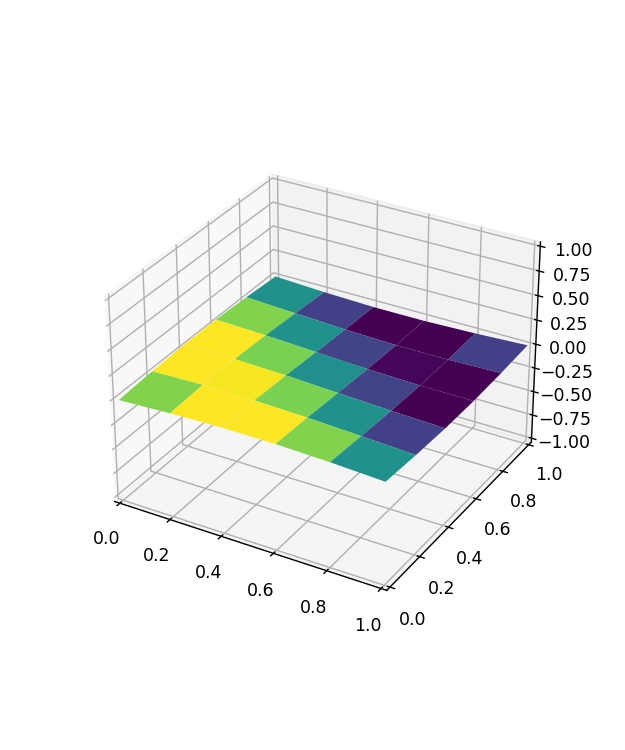

In [8]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    ax.set_xlim3d(0,1)
    ax.set_ylim3d(0,1)
    ax.set_zlim3d(-1,1)

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,T[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)